 Feature                 | Description                                                  |
|------------------------|--------------------------------------------------------------|
| Call Failures          | Number of call failures                                      |
| Complains              | Binary (0: No complaint, 1: Complaint)                        |
| Subscription Length    | Total months of subscription                                 |
| Charge Amount          | Ordinal attribute (0: Lowest amount, 9: Highest amount)      |
| Seconds of Use         | Total seconds of calls                                       |
| Frequency of Use       | Total number of calls                                        |
| Frequency of SMS       | Total number of text messages                                |
| Distinct Called Numbers| Total number of distinct phone calls                         |
| Age Group              | Ordinal attribute (1: Younger age, 5: Older age)             |
| Tariff Plan            | Binary (1: Pay as you go, 2: Contractual)                    |
| Status                 | Binary (1: Active, 2: Non-active)                            |
| Churn                  | Binary (1: Churn, 0: Non-churn) – Class label                |
| Customer Value         | The calculated value of the customer            

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Gathering

In [4]:
# Load a dataset
df = pd.read_csv('IranianTelecom_Classification.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [6]:
print(df.shape)
df.columns

(3150, 14)


Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

## 2. Data Understanding & Exploration

### 2.1 Missing Values

In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


### 2.2 Summery Statistics

In [8]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


## 3. Data Cleaning & Preprocessing

### 3.1 Updating Column Names for consistency

In [9]:
# Rename columns names to be more descriptive and readable

df = df.rename(columns={"Call  Failure" : "Failure_Calls_Total",
                        "Complains" : "Complaint_Flag",
                        "Subscription  Length": "Tenure",
                        "Charge  Amount" : "Charge_Rank",
                        "Seconds of Use" : "Call_Total_Seconds",
                        "Frequency of use" : "Calls_Total" ,
                        "Frequency of SMS" : "SMS_Total",
                        "Distinct Called Numbers" : "Distinct_Called_No_Total",
                        "Age Group" : "Age_Rank",
                        "Tariff Plan" : "Tariff_Plan",
                        "Status" : "Active_Status",
                        "Age" : "Age_Customer",
                        "Customer Value" : "Customer_LTV"
               })

### 3.2 Removing duiplicate rows

In [10]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 300


In [11]:
df = df.drop_duplicates()

In [12]:
print(df.shape)

(2850, 14)


### 3.3 Fix Inconsistent Data Entries

In [13]:
# Loop through columns to get unique values from all columns
for column in df.columns:
    unique_values = sorted(df[column].unique(), reverse=False)
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Failure_Calls_Total': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Unique values in column 'Complaint_Flag': [0, 1]
Unique values in column 'Tenure': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
Unique values in column 'Charge_Rank': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Unique values in column 'Call_Total_Seconds': [0, 8, 13, 33, 50, 60, 73, 80, 88, 93, 100, 110, 115, 128, 133, 148, 165, 180, 190, 193, 205, 210, 213, 215, 223, 245, 248, 258, 260, 263, 273, 275, 280, 290, 293, 295, 300, 305, 313, 315, 318, 323, 325, 335, 338, 345, 355, 365, 378, 380, 383, 385, 390, 393, 395, 398, 403, 405, 415, 418, 420, 428, 433, 438, 440, 450, 453, 455, 460, 465, 470, 472, 475, 485, 490, 495, 498, 503, 508, 510, 513, 515, 518, 520, 528, 530, 535, 538, 550, 553

### 3.4 Handle Missing Values

In [14]:
df.isnull().sum().sort_values(ascending=False)

Failure_Calls_Total         0
Complaint_Flag              0
Tenure                      0
Charge_Rank                 0
Call_Total_Seconds          0
Calls_Total                 0
SMS_Total                   0
Distinct_Called_No_Total    0
Age_Rank                    0
Tariff_Plan                 0
Active_Status               0
Age_Customer                0
Customer_LTV                0
Churn                       0
dtype: int64

### 3.5 Convert Data Types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Failure_Calls_Total       2850 non-null   int64  
 1   Complaint_Flag            2850 non-null   int64  
 2   Tenure                    2850 non-null   int64  
 3   Charge_Rank               2850 non-null   int64  
 4   Call_Total_Seconds        2850 non-null   int64  
 5   Calls_Total               2850 non-null   int64  
 6   SMS_Total                 2850 non-null   int64  
 7   Distinct_Called_No_Total  2850 non-null   int64  
 8   Age_Rank                  2850 non-null   int64  
 9   Tariff_Plan               2850 non-null   int64  
 10  Active_Status             2850 non-null   int64  
 11  Age_Customer              2850 non-null   int64  
 12  Customer_LTV              2850 non-null   float64
 13  Churn                     2850 non-null   int64  
dtypes: float64(1)

### 3.6 Encode categorical variables so their values start from 0

In [16]:
# Convert original categories to start from 0
df['Age_Rank'] = df['Age_Rank'].replace({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
df['Tariff_Plan']= df['Tariff_Plan'].replace({1:0,2:1})
df['Active_Status']= df['Active_Status'].replace({2:0})

## 4. Feature Engineering

## 4.1 Create Derived Features

In [17]:
# Group the tenure in bins of 12 months
# <=12 =1, <24= =2, <=36 =3. <=48 =4, the rest=5

def assign_tenure_group(tenure):
  if tenure <= 12:
    return '1'
  elif tenure <= 24:
    return '2'
  elif tenure <= 36:
    return '3'
  elif tenure <= 48:
    return '4'
  else:
    return '5'

# create a new 'tenure_group' column
df['Tenure_Group'] = df['Tenure'].apply(assign_tenure_group)

# datatype to be int64
df['Tenure_Group'] = df['Tenure_Group'].astype('int64')


### 3.7 Identify Categorial and Numerical Features

In [18]:
categorical_features= [ "Charge_Rank", "Age_Rank", "Tariff_Plan", "Tenure_Group", "Complaint_Flag", "Active_Status"]
numerical_features = [ "Failure_Calls_Total", "Customer_LTV", "Call_Total_Seconds", "Calls_Total", "SMS_Total", "Distinct_Called_No_Total"]
target = "Churn"

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Failure_Calls_Total       2850 non-null   int64  
 1   Complaint_Flag            2850 non-null   int64  
 2   Tenure                    2850 non-null   int64  
 3   Charge_Rank               2850 non-null   int64  
 4   Call_Total_Seconds        2850 non-null   int64  
 5   Calls_Total               2850 non-null   int64  
 6   SMS_Total                 2850 non-null   int64  
 7   Distinct_Called_No_Total  2850 non-null   int64  
 8   Age_Rank                  2850 non-null   int64  
 9   Tariff_Plan               2850 non-null   int64  
 10  Active_Status             2850 non-null   int64  
 11  Age_Customer              2850 non-null   int64  
 12  Customer_LTV              2850 non-null   float64
 13  Churn                     2850 non-null   int64  
 14  Tenure_Group 

## 5. Exploratory Data Analysis (EDA)

### 5.1 Univariate Analysis -- Categorical Features

c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

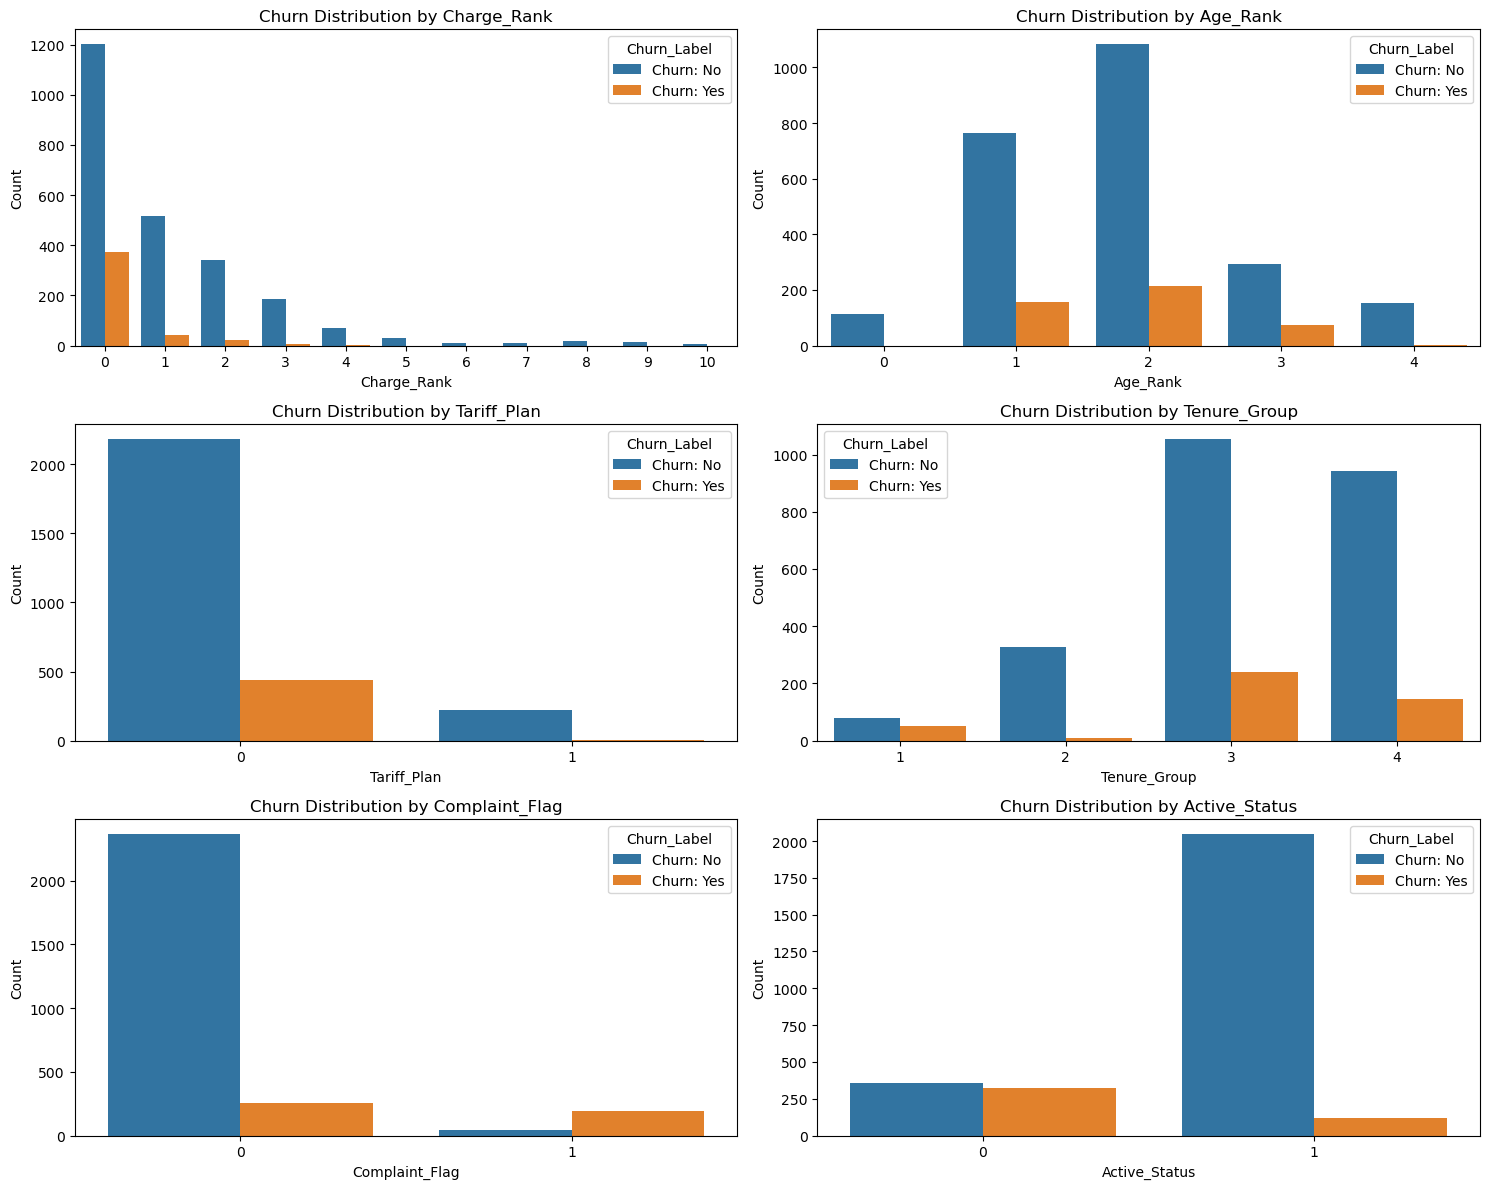

In [22]:
# Create a grid of count plots for each categorical variable
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 2x3 grid for 6 plots

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through categorical columns and create a count plot for each on the grid
for i, column in enumerate(categorical_features):
    sns.countplot(data=df, x=column, hue='Churn_Label', ax=axes[i])
    axes[i].set_title(f"Churn Distribution by {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

# Adjust layout for clarity
plt.tight_layout()
plt.show()

#### Summary: Age rank 1 and 2 with charge rank 0, and mostly pay-as-you-go customers will start churn in tenure group 3 and 4.

In [49]:
# Filter the data for Age_rank 1 and 2
age_rank_1 = df[df['Age_Rank'] == 1]
age_rank_2 = df[df['Age_Rank'] == 2]
age_rank_3 = df[df['Age_Rank'] == 3]

# Count the total number of Age_Rank 1 and 2
total_age_rank_1 = age_rank_1.shape[0]
total_age_rank_2 = age_rank_2.shape[0]
total_age_rank_3 = age_rank_3.shape[0]

# Count the number of churned customers in each Age_Rank
churned_age_rank_1 = age_rank_1[age_rank_1['Churn'] == 1].shape[0]
churned_age_rank_2 = age_rank_2[age_rank_2['Churn'] == 1].shape[0]
churned_age_rank_3 = age_rank_3[age_rank_3['Churn'] == 1].shape[0]

# Calculate the churn rate for each Age_Rank
percentage_churn_rate_age_rank_1 = churned_age_rank_1 / total_age_rank_1 * 100 
percentage_churn_rate_age_rank_2 = churned_age_rank_2 / total_age_rank_2 * 100
percentage_churn_rate_age_rank_3 = churned_age_rank_3 / total_age_rank_3 * 100

print("Total Age Rank 1:", total_age_rank_1)
print("Total Age Rank 2:", total_age_rank_2)
print("Total Age Rank 3:", total_age_rank_3)

print("Churned Age Rank 1:", churned_age_rank_1)
print("Churned Age Rank 2:", churned_age_rank_2)
print("Churned Age Rank 3:", churned_age_rank_3)

print("Churn Rate Age Rank 1:", percentage_churn_rate_age_rank_1)
print("Churn Rate Age Rank 2:", percentage_churn_rate_age_rank_2)
print("Churn Rate Age Rank 3:", percentage_churn_rate_age_rank_3)

Total Age Rank 1: 921
Total Age Rank 2: 1296
Total Age Rank 3: 367
Churned Age Rank 1: 157
Churned Age Rank 2: 213
Churned Age Rank 3: 74
Churn Rate Age Rank 1: 17.046688382193267
Churn Rate Age Rank 2: 16.435185185185187
Churn Rate Age Rank 3: 20.16348773841962


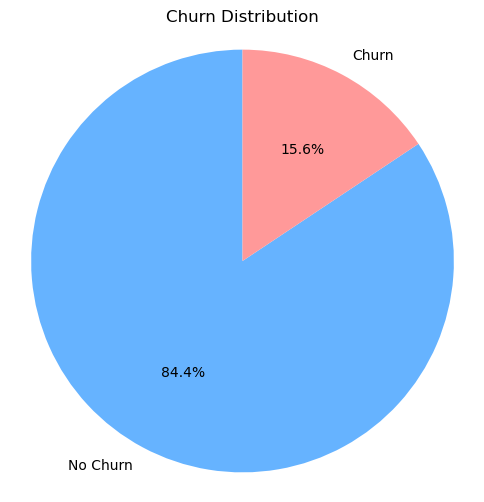

In [57]:
# Pie chart for Churn (target) distribution
churn_counts = df[target].value_counts()
labels = ['No Churn', 'Churn'] if 0 in churn_counts.index else churn_counts.index.astype(str)
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

### 5.2 Univariate Analysis -- Numercial Features

c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

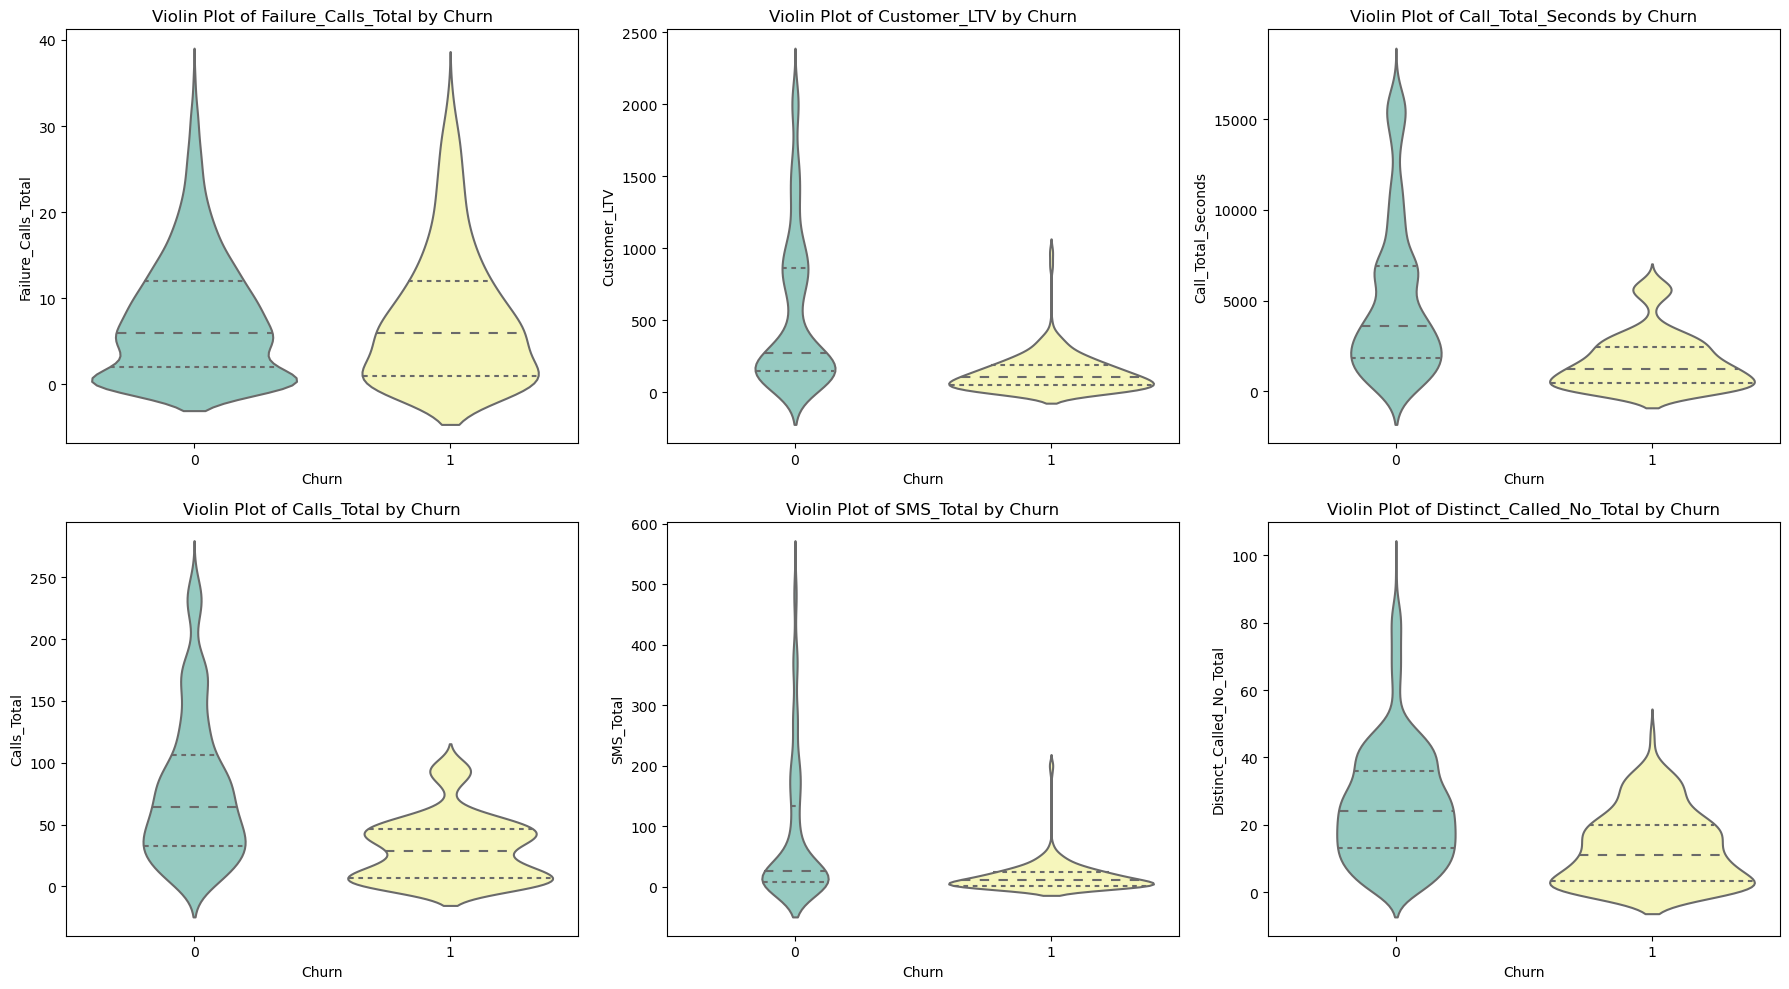

In [41]:
# Violin plots for numerical features by churn status
fig, axes = plt.subplots(nrows, 3, figsize=(18, 5 * nrows))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.violinplot(data=df, x=target, y=col, ax=axes[i], palette='Set3', inner='quartile')
    axes[i].set_title(f'Violin Plot of {col} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

#### Summary: Customers who use more phone call (more distinct no. and longer phone call) are more unlikely to churn.

c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aungt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

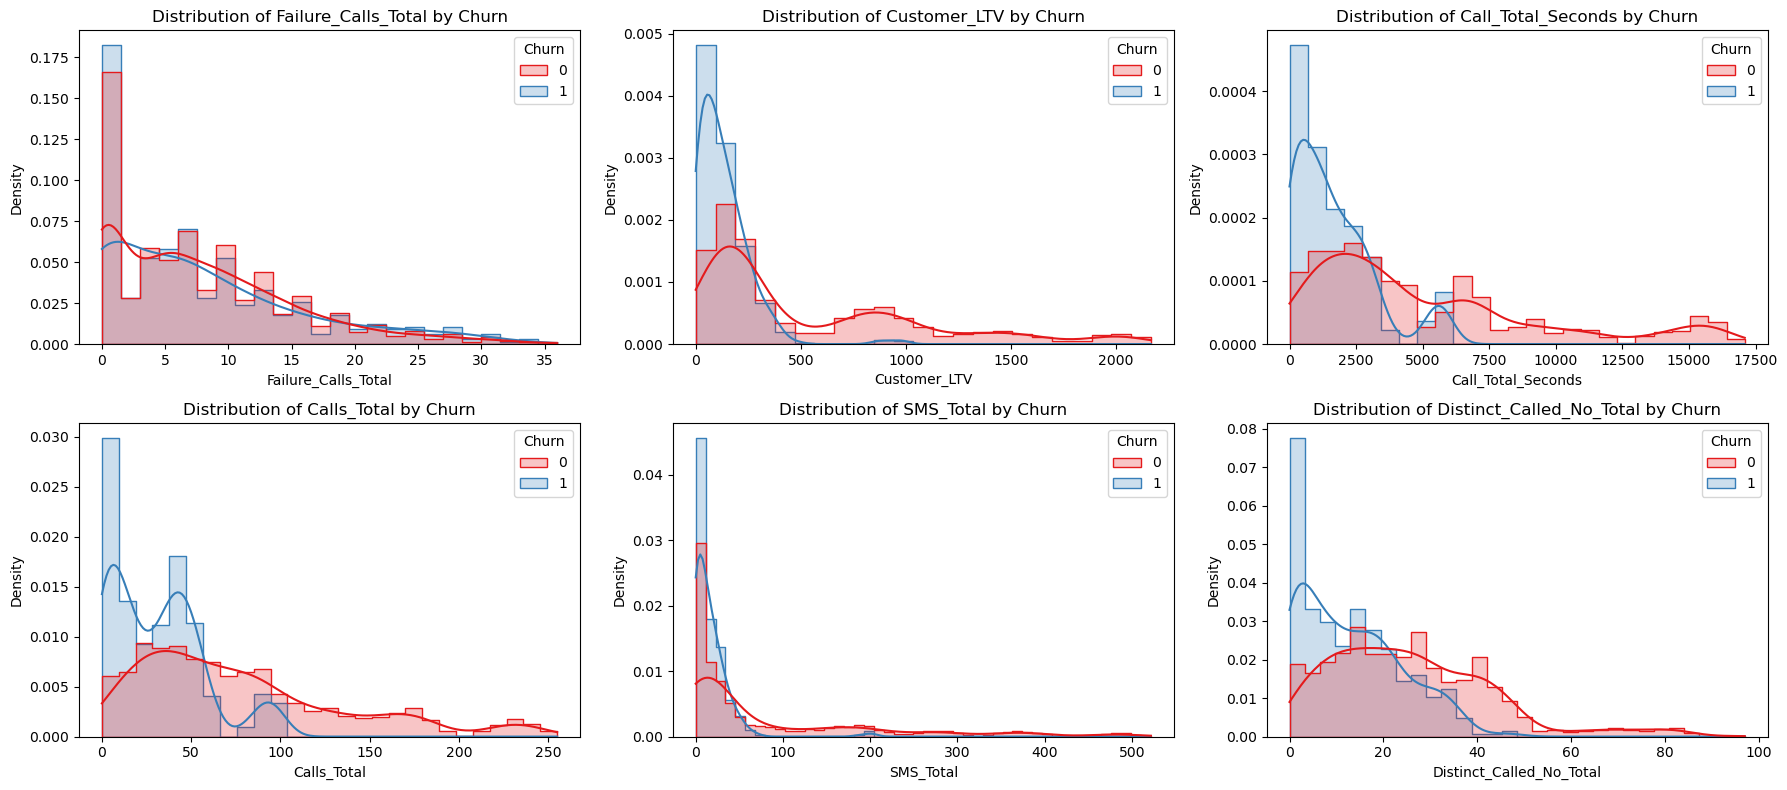

In [51]:
# Create a grid of distribution plots for each numerical variable with hue='Churn'
num_cols = len(numerical_features)
nrows = (num_cols + 2) // 3
fig, axes = plt.subplots(nrows, 3, figsize=(18, 4 * nrows))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[i], palette='Set1', element='step', stat='density', common_norm=False)
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Feature Importance Analysis -- Numerical features


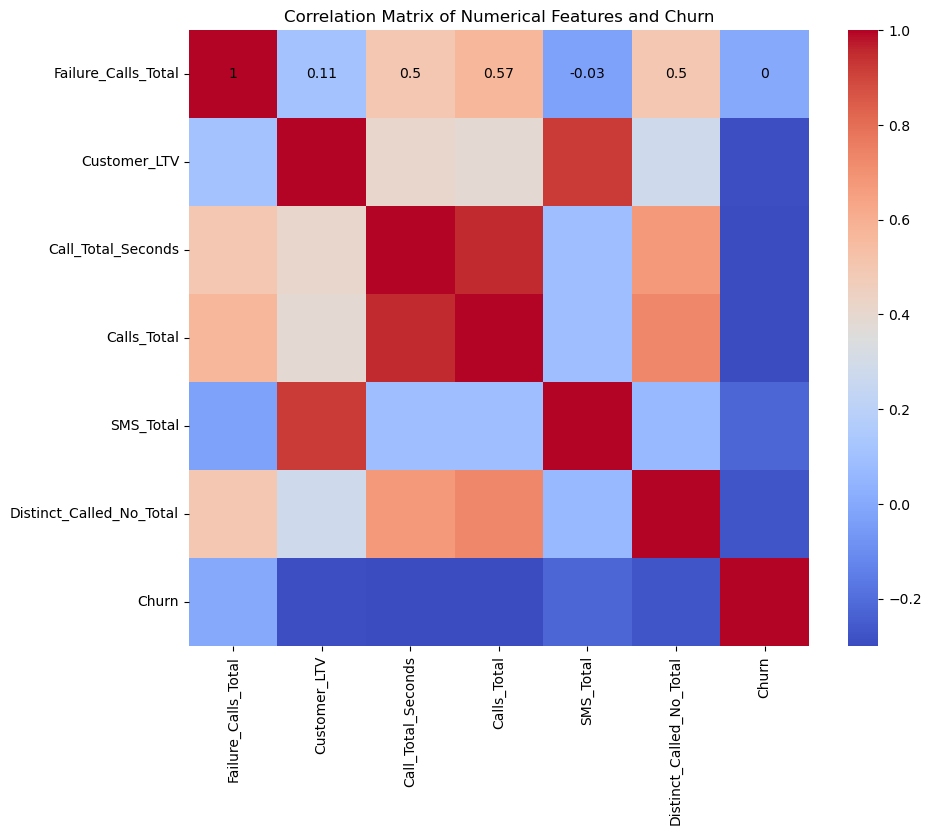

In [62]:
# Correlation matrix for numerical features and churn
corr_matrix = df[numerical_features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix.round(2), 
    annot=True, 
    cmap='coolwarm', 
    annot_kws={"size": 10, "color": "black"}  # bigger font & black text
)
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

7. Insights & Recommendations
Summarise findings from EDA.

Highlight patterns that may indicate churn risk.

Suggest data-driven recommendations.